In [7]:
import asammdf
import numpy as np
import py
import get_files

In [8]:
mdfs = get_files.get_files(
    directory='.',
    extensions=".mf4",
    depth=2,
    absolute=True
)

for mdf in mdfs:
    break
mdf

'/projects/RaspberryMDF/DevNotebooks/Data/4410e3a7-adc9-4eed-ba64-38303447175c.mf4'

In [9]:
def _path(self):
    return py.path.local(self._file.name)

def __repr__(self):
    return "MDF<{}, v={}>".format(self._path.basename, self.version)

extend = {
    "__repr__": __repr__,
    "_path": property(_path),
}
MDF2 = type("MDF2", (asammdf.MDF, ), extend)

mdf_ = MDF2(mdf)
mdf_

MDF<4410e3a7-adc9-4eed-ba64-38303447175c.mf4, v=4.11>

In [13]:
sine = mdf_.get("sine")

In [14]:
tf=10
t0=np.arange(0, tf, 1e-3, dtype=np.float32)
t1=np.arange(tf, 2*tf, 1e-3, dtype=np.float32)

In [17]:
def sine(t, A=1, f=1):
    sine_ = A*np.sin(
        2 * np.pi * f * t
    )
    return sine_

In [21]:
Signal = asammdf.Signal

In [22]:
signals = list()

signal0 = Signal(
    samples=sine(t0),
    timestamps=t0,
    name="sine",
    unit="",
)
signal1 = Signal(
    samples=sine(t1),
    timestamps=t1,
    name="sine",
    unit="",
)

In [25]:
%matplotlib inline

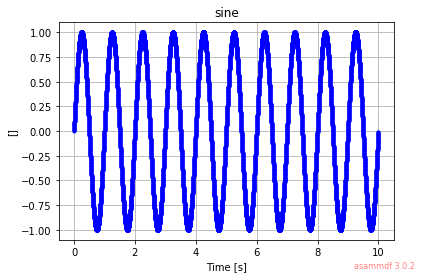

In [26]:

signal0.plot()

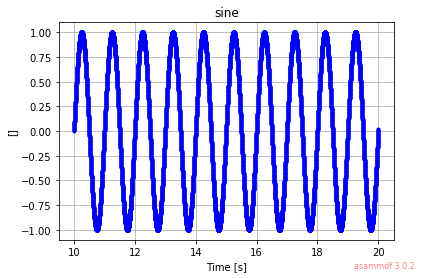

In [27]:
signal1.plot()

In [28]:
signal0.extend(signal1)

Signal(name=sine, samples=array([0.        , 0.00628314, 0.01256604, ..., 0.00654375, 0.01283769,
       0.01913113], dtype=float32), timestamps=array([0.0000000e+00, 1.0000000e-03, 2.0000001e-03, ..., 2.0001041e+01,
       2.0002043e+01, 2.0003044e+01], dtype=float32), unit=, conversion=None, comment=, raw=False)

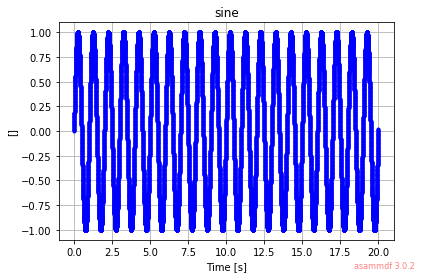

In [29]:
signal0.extend(signal1).plot()

In [ ]:
mdf = MDF(
    version='4.11',
)
mdf.append(
    signals=signals,
    common_timebase=False,
)
o = mdf.save(
    dst=str(channel_path),
    overwrite=True,
    compression=2,
)
print(o)